In [8]:
import open3d as o3d
import numpy as np

from skspatial.objects import Plane, Points
from skspatial.plotting import plot_3d
import matplotlib.pyplot as plt
import matplotlib
import time

import os

In [3]:
pcd = o3d.io.read_point_cloud('flat.ply')
assert isinstance(pcd, o3d.geometry.PointCloud)
print(pcd)

PointCloud with 4297125 points.


In [2]:
pcds: list[o3d.geometry.PointCloud] = []
plys_dir = 'very_flat_plys/'
for fn in os.listdir(plys_dir):
    pcds.append(o3d.io.read_point_cloud(plys_dir + fn))

In [3]:
o3d.visualization.draw_geometries([pcds[100]])

In [3]:
hole_pcd = pcds[100]

In [16]:
points = Points(np.asarray(hole_pcd.points))
plane = Plane.best_fit(points)

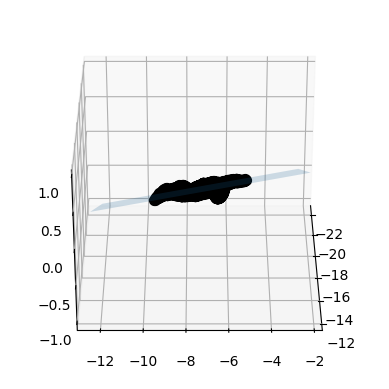

In [11]:
fig, ax = plot_3d(
    points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)
ax.view_init(30, 0)

In [7]:
downpcd = pcd.voxel_down_sample(voxel_size=0.5)

In [8]:
o3d.visualization.draw_geometries([downpcd])

(array([6329., 5206., 4345., 1172.,  351.,  192.,  126.,  110.,  101.,
         110.]),
 array([3.35923637e-06, 1.71009260e-02, 3.41984928e-02, 5.12960595e-02,
        6.83936263e-02, 8.54911931e-02, 1.02588760e-01, 1.19686327e-01,
        1.36783893e-01, 1.53881460e-01, 1.70979027e-01]),
 <BarContainer object of 10 artists>)

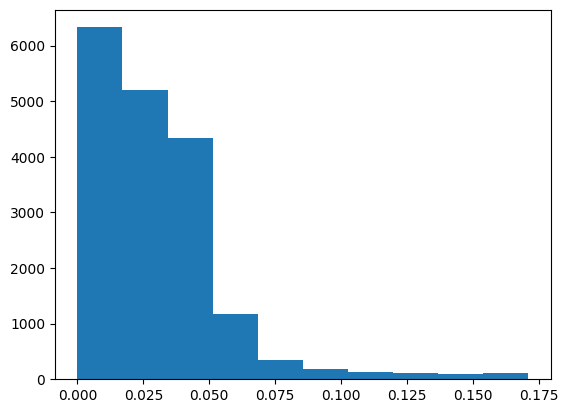

In [17]:
distances = [plane.distance_point(point) for point in points]
plt.hist(distances)

In [22]:
hole_points = []
for point in points:
    if plane.distance_point(point) > 0.15:
        hole_points.append(point)


In [26]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(hole_points)
pcd.paint_uniform_color([1.0, 0, 0])

PointCloud with 134 points.

In [28]:
o3d.visualization.draw_geometries([pcds[100], pcd])

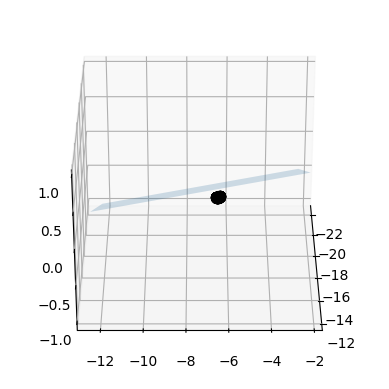

In [21]:
fig, ax = plot_3d(
    hole_points.plotter(c='k', s=50, depthshade=False),
    plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

ax.view_init(30, 0)

In [10]:
inliners = []
outliners = []

for pcd in pcds:
    plane_model, inliers = pcd.segment_plane(distance_threshold=0.1,
                                             ransac_n=3,
                                             num_iterations=1000)
    [a, b, c, d] = plane_model
    print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

    inlier_cloud = pcd.select_by_index(inliers)
    inlier_cloud.paint_uniform_color([1.0, 0, 0])
    outlier_cloud = pcd.select_by_index(inliers, invert=True)

    inliners.append(inlier_cloud)
    outliners.append(outlier_cloud)


Plane equation: -0.14x + 0.02y + 0.99z + -4.51 = 0
Plane equation: -0.02x + -0.03y + 1.00z + 0.04 = 0
Plane equation: -0.05x + -0.08y + 1.00z + 0.29 = 0
Plane equation: 0.04x + 0.06y + 1.00z + 2.23 = 0
Plane equation: 0.02x + -0.04y + 1.00z + 0.19 = 0
Plane equation: -0.01x + -0.12y + 0.99z + -0.20 = 0
Plane equation: -0.04x + 0.00y + 1.00z + -0.73 = 0
Plane equation: 0.01x + -0.01y + 1.00z + 0.16 = 0
Plane equation: 0.03x + 0.05y + 1.00z + 0.23 = 0
Plane equation: 0.09x + 0.05y + 0.99z + 0.51 = 0
Plane equation: 0.03x + 0.08y + 1.00z + 1.45 = 0
Plane equation: -0.06x + -0.10y + 0.99z + -1.69 = 0
Plane equation: -0.08x + -0.00y + 1.00z + -0.95 = 0
Plane equation: -0.07x + -0.02y + 1.00z + -0.05 = 0
Plane equation: -0.03x + 0.06y + 1.00z + 0.06 = 0
Plane equation: 0.01x + 0.14y + 0.99z + 1.72 = 0
Plane equation: -0.08x + -0.04y + 1.00z + -0.69 = 0
Plane equation: -0.04x + 0.05y + 1.00z + 0.27 = 0
Plane equation: -0.11x + -0.01y + 0.99z + -0.97 = 0
Plane equation: -0.12x + -0.11y + 0.99z

In [12]:
o3d.visualization.draw_geometries([*inliners, *outliners])